## Feature Engineering and CV based  on 5th Place Solutions

`param = {'objective': 'multi:softprob', 
         'eta': 0.05, 
         'max_depth': 8,
         'silent': 1, 
         'num_class': len(target_cols),
         'eval_metric': 'merror',
         'min_child_weight': 10,
         'min_split_loss': 1,
         'subsample': 0.7,
         'colsample_bytree': 0.7,
         'seed': 0}`
`n_repetition=5, num_rounds=150`

Max MAP@7 of 0.8613298 achieved at iteration 124.

Final MAP@7 of 0.8610498 achieved at iteration 150. 

New in this notebook:
- Trained@2015-06-28, validated@2015-12-28
- `min_child_weight=10` is much better than `min_child_weight=1`, try more trees to find the optimal number of iterations
- Overfitting appears to be a concern, consider the following parameters to control overfitting
    - Decrease `max_depth` to reduce complexity
    - Increase `min_child_weight` and `gamma` (alias `min_split_loss`) to control complexity. Prunes the splits where loss < `min_split_loss` (or `gamma`).
    - Decrease `subsample` and `colsample_bytree` to add more randomness
    - Reduce `eta` and increase `num_rounds` 
- Other parameters to reduce overfitting
    - `max_delta_step`: helpful in logistic regression when class is extremely imbalanced. Set it to 1-10.
    - `colsample_bylevel`: Subsample ratio of columns for each split, in each level.
    - `lambda`: L2 regularization
    - `alpha`: L1 regularization
    - `max_leaves`: Maximum number of nodes to be added. Only relevant when `grow_policy=lossguide`

In [1]:
from santander_helper import *

Train, validate, and predict, repetition 0 of 5
[0]	train-merror:0.292787	val-merror:0.344664	train-MAP@7:0	val-MAP@7:0.83066
[1]	train-merror:0.28984	val-merror:0.335325	train-MAP@7:0	val-MAP@7:0.842247
[2]	train-merror:0.286833	val-merror:0.332554	train-MAP@7:0	val-MAP@7:0.842799
[3]	train-merror:0.285218	val-merror:0.330806	train-MAP@7:0	val-MAP@7:0.845004
[4]	train-merror:0.284772	val-merror:0.329558	train-MAP@7:0	val-MAP@7:0.84755
[5]	train-merror:0.284024	val-merror:0.328833	train-MAP@7:0	val-MAP@7:0.848052
[6]	train-merror:0.283033	val-merror:0.328448	train-MAP@7:0	val-MAP@7:0.848787
[7]	train-merror:0.282297	val-merror:0.328082	train-MAP@7:0	val-MAP@7:0.848926
[8]	train-merror:0.281656	val-merror:0.327041	train-MAP@7:0	val-MAP@7:0.849396
[9]	train-merror:0.280944	val-merror:0.326843	train-MAP@7:0	val-MAP@7:0.850452
[10]	train-merror:0.281136	val-merror:0.327022	train-MAP@7:0	val-MAP@7:0.85118
[11]	train-merror:0.281266	val-merror:0.32708	train-MAP@7:0	val-MAP@7:0.851399
[12]	tr

[103]	train-merror:0.260665	val-merror:0.321285	train-MAP@7:0	val-MAP@7:0.861075
[104]	train-merror:0.260336	val-merror:0.32142	train-MAP@7:0	val-MAP@7:0.861087
[105]	train-merror:0.26032	val-merror:0.321388	train-MAP@7:0	val-MAP@7:0.861181
[106]	train-merror:0.260133	val-merror:0.32125	train-MAP@7:0	val-MAP@7:0.861308
[107]	train-merror:0.259987	val-merror:0.321405	train-MAP@7:0	val-MAP@7:0.86122
[108]	train-merror:0.259932	val-merror:0.321404	train-MAP@7:0	val-MAP@7:0.861257
[109]	train-merror:0.259896	val-merror:0.321593	train-MAP@7:0	val-MAP@7:0.861159
[110]	train-merror:0.259701	val-merror:0.321321	train-MAP@7:0	val-MAP@7:0.861261
[111]	train-merror:0.259639	val-merror:0.321277	train-MAP@7:0	val-MAP@7:0.861347
[112]	train-merror:0.259472	val-merror:0.321239	train-MAP@7:0	val-MAP@7:0.86134
[113]	train-merror:0.259357	val-merror:0.321283	train-MAP@7:0	val-MAP@7:0.86128
[114]	train-merror:0.259052	val-merror:0.321267	train-MAP@7:0	val-MAP@7:0.861321
[115]	train-merror:0.258964	val-me

[54]	train-merror:0.268493	val-merror:0.324151	train-MAP@7:0	val-MAP@7:0.857842
[55]	train-merror:0.268318	val-merror:0.324109	train-MAP@7:0	val-MAP@7:0.857969
[56]	train-merror:0.268355	val-merror:0.32377	train-MAP@7:0	val-MAP@7:0.858263
[57]	train-merror:0.268266	val-merror:0.323922	train-MAP@7:0	val-MAP@7:0.858314
[58]	train-merror:0.267954	val-merror:0.323821	train-MAP@7:0	val-MAP@7:0.858353
[59]	train-merror:0.267925	val-merror:0.323681	train-MAP@7:0	val-MAP@7:0.858556
[60]	train-merror:0.267881	val-merror:0.323827	train-MAP@7:0	val-MAP@7:0.85854
[61]	train-merror:0.267783	val-merror:0.323508	train-MAP@7:0	val-MAP@7:0.858766
[62]	train-merror:0.267636	val-merror:0.323339	train-MAP@7:0	val-MAP@7:0.858916
[63]	train-merror:0.267532	val-merror:0.323221	train-MAP@7:0	val-MAP@7:0.859056
[64]	train-merror:0.267441	val-merror:0.323174	train-MAP@7:0	val-MAP@7:0.859156
[65]	train-merror:0.267036	val-merror:0.323256	train-MAP@7:0	val-MAP@7:0.859224
[66]	train-merror:0.266898	val-merror:0.32

[5]	train-merror:0.283111	val-merror:0.330676	train-MAP@7:0	val-MAP@7:0.847959
[6]	train-merror:0.28282	val-merror:0.329916	train-MAP@7:0	val-MAP@7:0.847755
[7]	train-merror:0.28246	val-merror:0.329709	train-MAP@7:0	val-MAP@7:0.848107
[8]	train-merror:0.282089	val-merror:0.32967	train-MAP@7:0	val-MAP@7:0.84798
[9]	train-merror:0.281607	val-merror:0.328723	train-MAP@7:0	val-MAP@7:0.848921
[10]	train-merror:0.281279	val-merror:0.32857	train-MAP@7:0	val-MAP@7:0.849703
[11]	train-merror:0.281053	val-merror:0.327699	train-MAP@7:0	val-MAP@7:0.850221
[12]	train-merror:0.28109	val-merror:0.328113	train-MAP@7:0	val-MAP@7:0.849994
[13]	train-merror:0.280543	val-merror:0.327734	train-MAP@7:0	val-MAP@7:0.850348
[14]	train-merror:0.280194	val-merror:0.32667	train-MAP@7:0	val-MAP@7:0.851186
[15]	train-merror:0.279794	val-merror:0.326451	train-MAP@7:0	val-MAP@7:0.851362
[16]	train-merror:0.279324	val-merror:0.326151	train-MAP@7:0	val-MAP@7:0.851963
[17]	train-merror:0.279473	val-merror:0.325957	train

[108]	train-merror:0.260111	val-merror:0.321625	train-MAP@7:0	val-MAP@7:0.861262
[109]	train-merror:0.259957	val-merror:0.321755	train-MAP@7:0	val-MAP@7:0.861256
[110]	train-merror:0.259855	val-merror:0.321739	train-MAP@7:0	val-MAP@7:0.861222
[111]	train-merror:0.259739	val-merror:0.321771	train-MAP@7:0	val-MAP@7:0.861234
[112]	train-merror:0.259587	val-merror:0.321795	train-MAP@7:0	val-MAP@7:0.861229
[113]	train-merror:0.259441	val-merror:0.321792	train-MAP@7:0	val-MAP@7:0.861228
[114]	train-merror:0.259379	val-merror:0.32183	train-MAP@7:0	val-MAP@7:0.861196
[115]	train-merror:0.259347	val-merror:0.321992	train-MAP@7:0	val-MAP@7:0.861079
[116]	train-merror:0.259055	val-merror:0.322071	train-MAP@7:0	val-MAP@7:0.861007
[117]	train-merror:0.258974	val-merror:0.322035	train-MAP@7:0	val-MAP@7:0.861058
[118]	train-merror:0.258692	val-merror:0.321991	train-MAP@7:0	val-MAP@7:0.861167
[119]	train-merror:0.258551	val-merror:0.321814	train-MAP@7:0	val-MAP@7:0.861264
[120]	train-merror:0.258525	v

[59]	train-merror:0.267908	val-merror:0.323883	train-MAP@7:0	val-MAP@7:0.857957
[60]	train-merror:0.267461	val-merror:0.324003	train-MAP@7:0	val-MAP@7:0.858051
[61]	train-merror:0.267248	val-merror:0.324041	train-MAP@7:0	val-MAP@7:0.858113
[62]	train-merror:0.26706	val-merror:0.323769	train-MAP@7:0	val-MAP@7:0.858289
[63]	train-merror:0.266996	val-merror:0.323808	train-MAP@7:0	val-MAP@7:0.858308
[64]	train-merror:0.266755	val-merror:0.323907	train-MAP@7:0	val-MAP@7:0.858376
[65]	train-merror:0.266494	val-merror:0.323658	train-MAP@7:0	val-MAP@7:0.858593
[66]	train-merror:0.26639	val-merror:0.323538	train-MAP@7:0	val-MAP@7:0.858709
[67]	train-merror:0.266104	val-merror:0.323658	train-MAP@7:0	val-MAP@7:0.858741
[68]	train-merror:0.265904	val-merror:0.323575	train-MAP@7:0	val-MAP@7:0.85886
[69]	train-merror:0.265655	val-merror:0.323557	train-MAP@7:0	val-MAP@7:0.858883
[70]	train-merror:0.265489	val-merror:0.32318	train-MAP@7:0	val-MAP@7:0.859157
[71]	train-merror:0.265277	val-merror:0.3229

[10]	train-merror:0.281366	val-merror:0.327807	train-MAP@7:0	val-MAP@7:0.852273
[11]	train-merror:0.281161	val-merror:0.328063	train-MAP@7:0	val-MAP@7:0.851976
[12]	train-merror:0.280649	val-merror:0.327743	train-MAP@7:0	val-MAP@7:0.852419
[13]	train-merror:0.280425	val-merror:0.327719	train-MAP@7:0	val-MAP@7:0.852509
[14]	train-merror:0.279937	val-merror:0.326893	train-MAP@7:0	val-MAP@7:0.853431
[15]	train-merror:0.279738	val-merror:0.32612	train-MAP@7:0	val-MAP@7:0.853745
[16]	train-merror:0.279794	val-merror:0.32638	train-MAP@7:0	val-MAP@7:0.853464
[17]	train-merror:0.279335	val-merror:0.326373	train-MAP@7:0	val-MAP@7:0.853392
[18]	train-merror:0.278709	val-merror:0.326274	train-MAP@7:0	val-MAP@7:0.853714
[19]	train-merror:0.278445	val-merror:0.325879	train-MAP@7:0	val-MAP@7:0.854058
[20]	train-merror:0.278311	val-merror:0.325839	train-MAP@7:0	val-MAP@7:0.853785
[21]	train-merror:0.277799	val-merror:0.325546	train-MAP@7:0	val-MAP@7:0.854024
[22]	train-merror:0.277415	val-merror:0.32

[113]	train-merror:0.25905	val-merror:0.321797	train-MAP@7:0	val-MAP@7:0.861787
[114]	train-merror:0.258935	val-merror:0.321721	train-MAP@7:0	val-MAP@7:0.861869
[115]	train-merror:0.258588	val-merror:0.321845	train-MAP@7:0	val-MAP@7:0.861806
[116]	train-merror:0.258505	val-merror:0.321714	train-MAP@7:0	val-MAP@7:0.861955
[117]	train-merror:0.258534	val-merror:0.321717	train-MAP@7:0	val-MAP@7:0.86193
[118]	train-merror:0.258415	val-merror:0.321844	train-MAP@7:0	val-MAP@7:0.861861
[119]	train-merror:0.258352	val-merror:0.321787	train-MAP@7:0	val-MAP@7:0.861854
[120]	train-merror:0.258289	val-merror:0.321692	train-MAP@7:0	val-MAP@7:0.861963
[121]	train-merror:0.258195	val-merror:0.321557	train-MAP@7:0	val-MAP@7:0.861898
[122]	train-merror:0.258086	val-merror:0.321487	train-MAP@7:0	val-MAP@7:0.861995
[123]	train-merror:0.258111	val-merror:0.321341	train-MAP@7:0	val-MAP@7:0.862112
[124]	train-merror:0.257755	val-merror:0.321487	train-MAP@7:0	val-MAP@7:0.862077
[125]	train-merror:0.257653	va

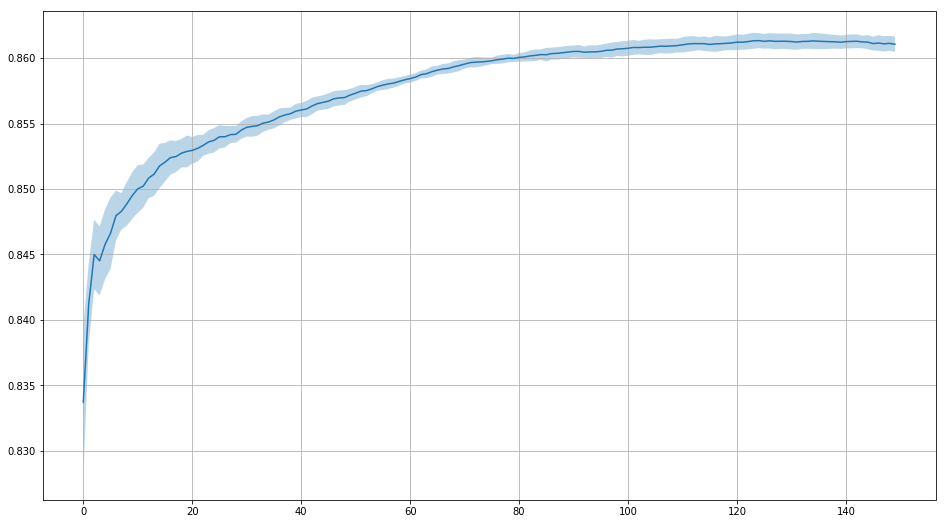

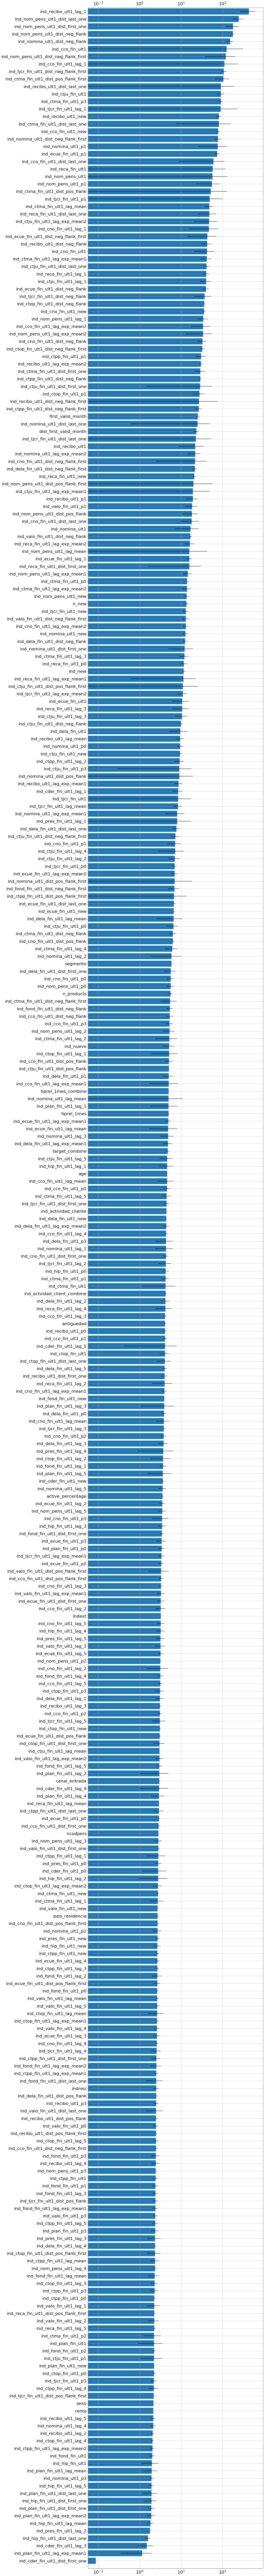

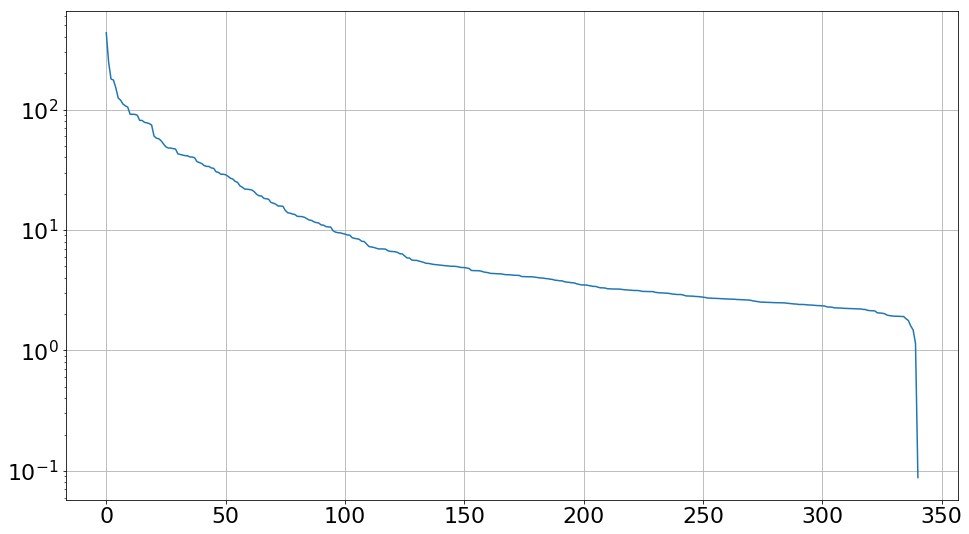

In [2]:
# Train, validation, and prediction
simulation_name = 'p3'
param = {'objective': 'multi:softprob', 
         'eta': 0.05, 
         'max_depth': 8,
         'silent': 1, 
         'num_class': len(target_cols),
         'eval_metric': 'merror',
         'min_child_weight': 10,
         'min_split_loss': 1,
         'subsample': 0.7,
         'colsample_bytree': 0.7,
         'seed': 0}
num_rounds = 150
n_repeat = 5

history, model_dict, y_pred, y_sub = \
    train_test_month(param, num_rounds, '2015-06-28', '2016-05-28', 
    sub_name='eda_4_32_{}.csv.gz'.format(simulation_name), 
    n_repeat=n_repeat, random_seed=54, 
    n_features=350, eval_train_flag=False)

# History and learning curve
history_train = history.xs(axis=1, level=[1, 2], key=['train', 'MAP@7']).copy()
history_train['mean'] = history_train.iloc[:, :n_repeat].mean(axis=1)
history_train['std'] = history_train.iloc[:, :n_repeat].std(axis=1)

history_val = history.xs(axis=1, level=[1, 2], key=['val', 'MAP@7']).copy()
history_val['mean'] = history_val.iloc[:, :n_repeat].mean(axis=1)
history_val['std'] = history_val.iloc[:, :n_repeat].std(axis=1)

plt.figure(figsize=(16, 9))
# plt.plot(history_train['mean'])
# plt.fill_between(history_train.index, history_train['mean']+history_train['std'], history_train['mean']-history_train['std'], alpha=0.3)

plt.plot(history_val['mean'])
plt.fill_between(history_val.index, history_val['mean']+history_val['std'], history_val['mean']-history_val['std'], alpha=0.3)

plt.grid()

# Feature importance
fi = pd.DataFrame({i: model_dict[i].get_score(importance_type='gain') for i in range(n_repeat)})
fi['mean'] = fi.iloc[:, :n_repeat].mean(axis=1)
fi['std'] = fi.iloc[:, :n_repeat].std(axis=1)
fi.sort_values(by=['mean'], inplace=True, ascending=False)
# fi.reset_index(inplace=True)
#fi.to_csv('feature_importance_{}.csv'.format(simulation_name))

plt.rcParams.update({'figure.figsize': '16, 240'})
plt.rcParams.update({'font.size': '22'})
fig, ax = plt.subplots()
ax.barh(fi.index, fi['mean'].values, log=True, xerr=fi['std'].values)
ax.grid()
ax.tick_params(labelbottom=True,labeltop=True)
ax.set_ylim(fi.shape[0], -0.5)

plt.figure(figsize=(16, 9))
plt.plot(fi.values[:, n_repeat])
plt.grid()
plt.yscale('log')

# Save data
save_pickle('parameter_tune_eda_4_32_{}.pickle'.format(simulation_name), (history, model_dict, y_pred, y_sub, fi, param))

In [3]:
history_val

repetition,0,1,2,3,4,mean,std
0,0.830660,0.829457,0.843751,0.832739,0.831975,0.833716,0.005748
1,0.842247,0.837068,0.843497,0.838902,0.844371,0.841217,0.003114
2,0.842799,0.842434,0.847158,0.844199,0.848401,0.844998,0.002660
3,0.845004,0.841572,0.846642,0.842006,0.847351,0.844515,0.002635
4,0.847550,0.842380,0.846343,0.843779,0.848830,0.845776,0.002661
5,0.848052,0.844107,0.847959,0.843352,0.849625,0.846619,0.002733
6,0.848787,0.847027,0.847755,0.845592,0.850663,0.847965,0.001905
7,0.848926,0.847943,0.848107,0.846341,0.850145,0.848292,0.001396
8,0.849396,0.848499,0.847980,0.847049,0.851426,0.848870,0.001662
9,0.850452,0.848854,0.848921,0.847301,0.852003,0.849506,0.001786


In [5]:
print('Max MAP@7 of {:.7f} achieved at iteration {}.'.format(history_val['mean'].max(), history_val['mean'].idxmax()))
print('Final MAP@7 of {:.7f} achieved at iteration {}.'.format(history_val['mean'].iloc[-1], num_rounds))

Max MAP@7 of 0.8613298 achieved at iteration 124.
Final MAP@7 of 0.8610498 achieved at iteration 150.
